### Lo scopo di questo cosice è quello di costruire una CNN per il riconoscimento dei caratteri hiragana (il dataset utilizzato viene costruito con il codice nel notebook Last Hiragana Dataset) tramite la libreria Tensorflow.

### Tutti il convulutional layers della CNN hanno un dropout con coefficiente posto a 0.3 (non ho fatto molte prove ma già così funziona bene quindi non ho fatto modifiche).

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow_datasets as tfds

In [2]:
dataset_path = 'C:/Users/andma/OneDrive/Documenti/hiragana images/hiragana_images'

In [3]:
# Create the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, color_mode='grayscale', labels = 'inferred', image_size=(84, 84), validation_split=0.15, seed=42, subset='training'
)

Found 2000 files belonging to 50 classes.
Using 1700 files for training.


In [4]:
# Get the number of elements in the dataset
elements = tf.cast(dataset.cardinality(), tf.int64)
num_elements = elements.numpy()

# Split the dataset into a training set, a validation set, and a test set
train_dataset = dataset.take(int(0.7 * num_elements))
validation_dataset = dataset.skip(int(0.7 * num_elements)).take(int(0.15 * num_elements))
test_dataset = dataset.skip(int(0.85 * num_elements))

# Print the shapes of the datasets
print("Train dataset:", train_dataset.element_spec)
print("Validation dataset:", validation_dataset.element_spec)
print("Test dataset:", test_dataset.element_spec)

Train dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Validation dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Test dataset: (TensorSpec(shape=(None, 84, 84, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling

In [6]:
img_height = 84
img_width = 84

filters = 32
num_classes = 50
dropout_coeff = 0.3

model = Sequential()

##### Rescaling layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 1)))

##### First convolution layer
model.add(Conv2D(filters, (3,3)))  #, input_shape = x_trainr.shape[1:]
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(39, 39)))

##### Second convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(17, 17)))

##### Third convolution layer
model.add(Conv2D(filters, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(dropout_coeff, input_shape=(8, 8)))

##### Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##### Fully Connected Layer #2
model.add(Dense(64))
model.add(Activation("relu"))

##### Last Fully Connected Layer, 50 Outputs
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 84, 84, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 82, 82, 32)        320       
                                                                 
 activation (Activation)     (None, 82, 82, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 41, 41, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 32)        9248      
                                                        

In [8]:
##### Compiling the Model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
#Traing with the second splitting of the dataset
epochs_data2 = 15

history_2 = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs_data2)

Epoch 1/15
37/37 [==============================] - 6s 121ms/step - loss: 3.6576 - accuracy: 0.0845 - val_loss: 2.8889 - val_accuracy: 0.2500
Epoch 2/15
37/37 [==============================] - 5s 122ms/step - loss: 1.9997 - accuracy: 0.4586 - val_loss: 1.2683 - val_accuracy: 0.6914
Epoch 3/15
37/37 [==============================] - 5s 122ms/step - loss: 0.9370 - accuracy: 0.7272 - val_loss: 0.6565 - val_accuracy: 0.7891
Epoch 4/15
37/37 [==============================] - 4s 99ms/step - loss: 0.5340 - accuracy: 0.8328 - val_loss: 0.3722 - val_accuracy: 0.8945
Epoch 5/15
37/37 [==============================] - 4s 109ms/step - loss: 0.3475 - accuracy: 0.8868 - val_loss: 0.1813 - val_accuracy: 0.9453
Epoch 6/15
37/37 [==============================] - 4s 103ms/step - loss: 0.2755 - accuracy: 0.9130 - val_loss: 0.1613 - val_accuracy: 0.9531
Epoch 7/15
37/37 [==============================] - 4s 104ms/step - loss: 0.1954 - accuracy: 0.9400 - val_loss: 0.2139 - val_accuracy: 0.9453
Epoch 8

In [10]:
print('loss = ', history_2.history['loss'][-1])
print('accuracy = ', history_2.history['accuracy'][-1])
print('val_loss = ', history_2.history['val_loss'][-1])
print('val_accuracy = ', history_2.history['val_accuracy'][-1])

loss =  0.0355181060731411
accuracy =  0.9890202879905701
val_loss =  0.048958875238895416
val_accuracy =  0.9765625


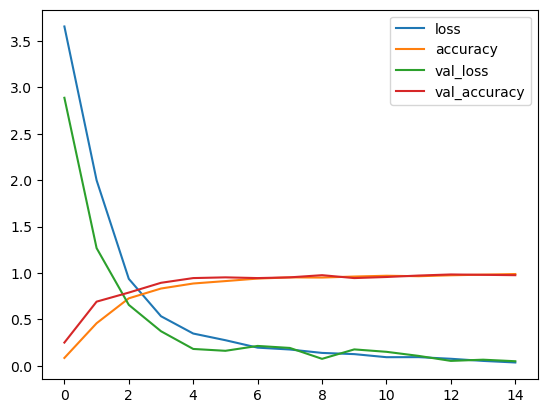

In [11]:
epoch_num = list(range(0, epochs_data2))
plt.plot(epoch_num, history_2.history['loss'], label = 'loss')
plt.plot(epoch_num, history_2.history['accuracy'], label = 'accuracy')
plt.plot(epoch_num, history_2.history['val_loss'], label = 'val_loss')
plt.plot(epoch_num, history_2.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [12]:
prediction = model.predict(test_dataset)

9/9 [==============================] - 1s 34ms/step


In [13]:
print('loss = ', history_2.history['loss'][-1])
print('accuracy = ', history_2.history['accuracy'][-1])

loss =  0.0355181060731411
accuracy =  0.9890202879905701


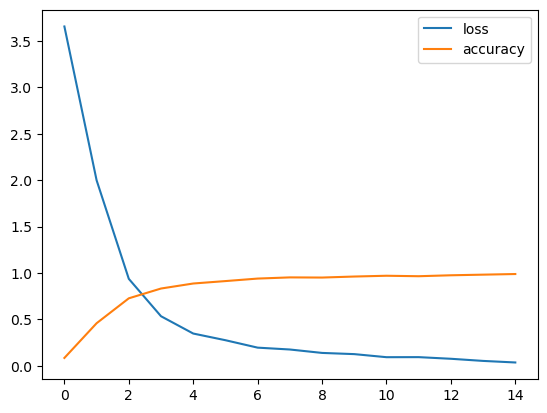

In [14]:
epoch_num = list(range(0, epochs_data2))
plt.plot(epoch_num, history_2.history['loss'], label = 'loss')
plt.plot(epoch_num, history_2.history['accuracy'], label = 'accuracy')
plt.legend()
plt.show()

### Codice utilizzato in precedenza ma che ora è obsoleto

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(dataset_path,
                                                                color_mode='grayscale',
                                                                labels = 'inferred',
                                                                batch_size=32,
                                                                image_size=(84, 84),
                                                                seed=1,
                                                                validation_split=0.2,
                                                                subset='training')

In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(dataset_path,
                                                                color_mode='grayscale',
                                                                labels = 'inferred',
                                                                batch_size=32,
                                                                image_size=(84, 84),
                                                                seed=1,
                                                                validation_split=0.2,
                                                                subset='validation')

In [ ]:
epochs = 15

history = model.fit(train_data, validation_data=val_data, epochs=epochs)

In [ ]:
print('loss = ', history.history['loss'][-1])
print('accuracy = ', history.history['accuracy'][-1])
print('val_loss = ', history.history['val_loss'][-1])
print('val_accuracy = ', history.history['val_accuracy'][-1])

In [ ]:
epoch_num = list(range(0, epochs))
plt.plot(epoch_num, history.history['loss'], label = 'loss')
plt.plot(epoch_num, history.history['accuracy'], label = 'accuracy')
plt.plot(epoch_num, history.history['val_loss'], label = 'val_loss')
plt.plot(epoch_num, history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()